In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import PIL
from google.colab import drive
import zipfile
import matplotlib.pyplot as plt
import cv2

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
os.listdir('gdrive/MyDrive/Dataset')

['dataset_HDD_train_kecil1.zip', 'dataset_HDD_val_kecil1.zip']

In [3]:
path_train = os.path.join('gdrive', 'MyDrive', 'dataset', 'dataset_HDD_train_kecil1.zip')
path_val = os.path.join('gdrive', 'MyDrive', 'dataset', 'dataset_HDD_val_kecil1.zip')

file = zipfile.ZipFile(path_train)
file.extractall()
file.close()

myfile = zipfile.ZipFile(path_val)
myfile.extractall()
myfile.close()

In [2]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1 / 255,
    width_shift_range=0.1,  
    height_shift_range=0.1, 
    zoom_range=0.2, 
    horizontal_flip=True,  
    brightness_range=(0.8, 1.2),  
    fill_mode='nearest'
)

val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [9]:
train_generator = train_datagen.flow_from_directory(
        'dataset_SSD_train',  # This is the source directory for training images
        target_size=(600, 600),  # All images will be resized to 150x150
        batch_size=150,
        class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
        'dataset_SSD_val',  # This is the source directory for training images
        target_size=(600, 600),  # All images will be resized to 150x150
        batch_size=150,
        class_mode='categorical')

Found 40800 images belonging to 51 classes.
Found 8364 images belonging to 51 classes.


In [4]:
from tensorflow.keras import layers
from tensorflow.keras import Model
import tensorflow.keras.applications

#local_weight = os.path.join('inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5')

pre_trained = tensorflow.keras.applications.EfficientNetB0(
    input_shape=(600,600,3),
    include_top=False,
    weights="imagenet",
)


In [5]:
for layer in pre_trained.layers:
    layer.trainable = False

In [6]:
model = tf.keras.models.Sequential()
model.add(pre_trained)
model.add(layers.BatchNormalization(renorm=True))
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(51, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb0 (Functional)  (None, 19, 19, 1280)     4049571   
                                                                 
 batch_normalization (BatchN  (None, 19, 19, 1280)     8960      
 ormalization)                                                   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 batch_normalization_1 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                        

In [ ]:
h = model.fit(train_generator,
              validation_data=val_generator,
              steps_per_epoch=100,
              epochs = 8,
              verbose = 1)

Epoch 1/8
100/100 [==============================] - 1696s 17s/step - loss: 4.2442 - accuracy: 0.0199 - val_loss: 3.9523 - val_accuracy: 0.0196
Epoch 2/8
 73/100 [====================>.........] - ETA: 6:23 - loss: 4.1540 - accuracy: 0.0197

In [35]:
from tensorflow.keras.utils import load_img, img_to_array

tes_path = os.path.join('1_HDD.jpg')
img = load_img(tes_path, target_size=(600, 600))
x = img_to_array(img)
x /= 255
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
yhat = model.predict(images)
yhat = np.argmax(yhat, axis=1)[0]
print(yhat)

1/1 [==============================] - 0s 41ms/step
1


In [19]:
loss_train = h.history['loss']
loss_val = h.history['val_loss']
train_acc = h.history['accuracy']
val_acc = h.history['val_accuracy']
epochs = range(1, 7)

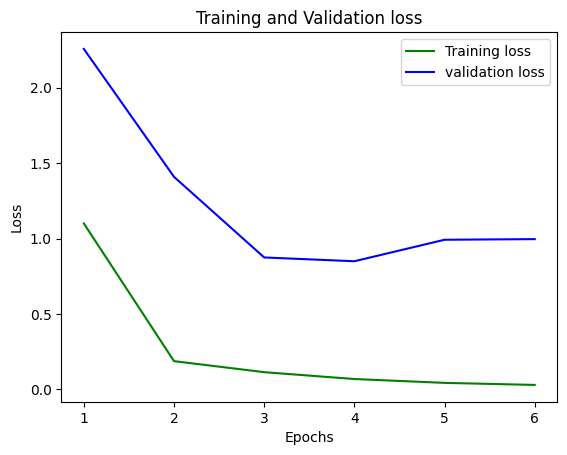

In [20]:
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

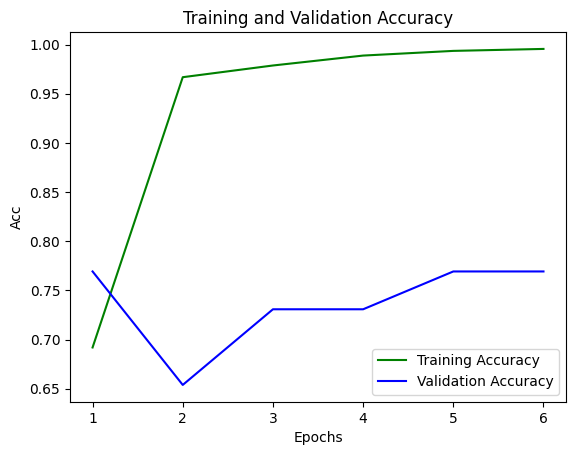

In [21]:
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [22]:
model.save('model_HDD.h5')

In [36]:
os.mkdir('dataset_SSD_train')
os.mkdir('dataset_SSD_val')

In [37]:
file = zipfile.ZipFile('gdrive/MyDrive/dataset/dataset_SSD.zip')
file.extractall()
file.close()

In [45]:
for folder in os.listdir('dataset_SSD'):
  nyimpen1 = 'dataset_SSD_train'
  nyimpen2 = 'dataset_SSD_val'
  os.mkdir(os.path.join(nyimpen1, folder))
  os.mkdir(os.path.join(nyimpen2, folder))
  for image in os.listdir(os.path.join('dataset_SSD', folder)):
    img = cv2.imread(os.path.join('dataset_SSD', folder, image))
    img = cv2.resize(img, (600,600), interpolation=cv2.INTER_AREA)
    for i in range(200):
      if i < 41:
        cv2.imwrite(os.path.join(nyimpen2, folder, image.split('.')[0] + 'copy' + str(i) + '.jpg'), img)
      cv2.imwrite(os.path.join(nyimpen1, folder, image.split('.')[0] + 'copy' + str(i) + '.jpg'), img)

In [18]:
rmdir /content/dataset_SSD_train/.ipynb_checkpoints

In [19]:
rmdir /content/dataset_SSD_val/.ipynb_checkpoints